# Names


1.	George Reda George               49-0301
2.	Fady Mounir Fouad                  49-0716
3.	Youssef Atef Mourad                49-5215

George.reda@student.guc.edu.eg,
fady.elsokary@student.guc.edu.eg,
Youssef.mourad@student.guc.edu.eg


To determine the color representation of an image in terms of pixel data (e.g., grayscale, RGB, or multi-spectrum),

In [ ]:
def get_image_color_representation(image_path):
    with open(image_path, 'rb') as file:
        # Read the first few bytes to identify the image format
        header = file.read(10)

        if header.startswith(b'\xff\xd8\xff\xe0\x00\x10JFIF'):  # JPEG format
            return "RGB"  # JPEG can store RGB images

        elif header.startswith(b'\x89PNG\r\n\x1a\n'):  # PNG format
            # Seek to the byte where color type is stored
            file.seek(25)

            # Read the color type byte
            color_type_byte = file.read(1)

            # Determine the color representation based on the color type byte
            if color_type_byte == b'\x00':  
                return "Grayscale"
            elif color_type_byte == b'\x02':  
                return "RGB"
            elif color_type_byte == b'\x04':  
                return "Grayscale with alpha"
            elif color_type_byte == b'\x06':  
                return "RGB with alpha"
            else:
                return "Unknown color representation"
        
        else:
            return "Unsupported image format"

# Example usage
image_path = "path/to/your/image.jpg"
color_representation = get_image_color_representation(image_path)
print("Color Representation:", color_representation)


In [1]:
import os
import matplotlib.pyplot as plt
from skimage import io, color
import numpy as np
from google.colab import drive

drive.mount('/content/gdrive')


directory = '/content/gdrive/MyDrive/Dataset/train'

# Get a list of all image files in the directory
image_files = [f for f in os.listdir(directory) if f.endswith('.jpg') or f.endswith('.png')]

segmented_images_all = []


for image_file in image_files:

    image_path = os.path.join(directory, image_file)
    image = io.imread(image_path)


    gray_image = color.rgb2gray(image)

    # Apply thresholding
    threshold = 0.5
    segmented_image = np.where(gray_image > threshold, 0.0, 1.0)

    # Append the segmented image along with its name to the list
    segmented_images_all.append({'name': image_file, 'segmented_image': segmented_image})


for segmented_image_info in segmented_images_all[:10]:
    print("Name:", segmented_image_info['name'])
    print("Segmented Image:")
    print(segmented_image_info['segmented_image'])
    print("Shape:", segmented_image_info['segmented_image'].shape)
    print()


Mounted at /content/gdrive
Name: 187083.jpg
Segmented Image:
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
Shape: (481, 321)

Name: 202012.jpg
Segmented Image:
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
Shape: (321, 481)

Name: 109034.jpg
Segmented Image:
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [0. 0. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Shape: (321, 481)

Name: 161062.jpg
Segmented Image:
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
Shape: (321, 481)

Name: 113009.jpg
Segmented Image:
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.

In [2]:
from skimage import color

GroundTruth = []

# Iterate over each segmented image
for segmented_image_info in segmented_images_all:

    segmented_image_gray = (segmented_image_info['segmented_image'])

    # Append a tuple containing the name and the grayscale image to GroundTruth
    GroundTruth.append((segmented_image_info['name'], segmented_image_gray))


for name, segmented_image_gray in GroundTruth[:10]:
    print("Name:", name)
    print("Grayscale Image:")
    print(segmented_image_gray)
    print("Shape:", segmented_image_gray.shape)
    print()
print(GroundTruth[1])

Name: 187083.jpg
Grayscale Image:
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
Shape: (481, 321)

Name: 202012.jpg
Grayscale Image:
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
Shape: (321, 481)

Name: 109034.jpg
Grayscale Image:
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [0. 0. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Shape: (321, 481)

Name: 161062.jpg
Grayscale Image:
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
Shape: (321, 481)

Name: 113009.jpg
Grayscale Image:
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]


In [3]:
import os
import cv2

# Function to process a single image and extract its RGB components
def process_image(image_path):

    image = cv2.imread(image_path)


    height, width, channels = image.shape

    # Initialize an empty array to store the RGB components and change it according to my input
    Component_array = [[[0, 0, 0] for _ in range(width)] for _ in range(height)]

    # Iterate over each pixel and extract its RGB components
    for y in range(height):
        for x in range(width):

            (r ,g ,b) = image[y, x]

            rgb_array[y][x] = (r ,g ,b)  # Store as tuple

    return rgb_array


images_directory = '/content/gdrive/MyDrive/Dataset/train'# Replace "images_directory" with the path to your directory containing images


output_data_with_names = []

# Loop through each image in the directory
for filename in os.listdir(images_directory):
    if filename.endswith(".jpg") or filename.endswith(".png"):  # You can add more extensions if needed

        image_path = os.path.join(images_directory, filename)
        rgb_array = process_image(image_path)


        output_data_with_names.append((filename, rgb_array))


for i in range(min(5, len(output_data_with_names))):
    name, data = output_data_with_names[i]
    print("Name of image:", name)
    print("Summary of output data:")
    print("Shape:", len(data), "x", len(data[0]), "RGB tuples")
    print("Sample data (first 3 rows):", data[:3])
    print()
print(output_data_with_names[1])

Name of image: 187083.jpg
Summary of output data:
Shape: 481 x 321 RGB tuples
Sample data (first 3 rows): [[(7, 20, 22), (5, 23, 24), (8, 28, 33), (0, 26, 30), (10, 46, 52), (22, 67, 71), (14, 62, 68), (12, 64, 70), (12, 67, 72), (18, 73, 78), (25, 78, 81), (28, 81, 84), (35, 83, 89), (38, 86, 92), (39, 87, 93), (39, 87, 93), (38, 89, 92), (37, 88, 91), (37, 88, 91), (36, 87, 90), (37, 87, 93), (38, 88, 94), (39, 89, 95), (39, 89, 95), (40, 92, 99), (38, 90, 97), (41, 93, 100), (42, 94, 101), (40, 93, 103), (38, 91, 101), (35, 88, 98), (37, 90, 100), (44, 93, 101), (42, 91, 99), (40, 89, 97), (42, 91, 99), (45, 94, 102), (48, 97, 105), (48, 99, 109), (49, 100, 110), (50, 102, 114), (54, 106, 118), (56, 110, 121), (59, 115, 126), (60, 115, 128), (58, 116, 128), (61, 118, 133), (59, 118, 133), (60, 119, 135), (58, 118, 134), (56, 118, 134), (56, 118, 134), (55, 119, 137), (55, 119, 137), (54, 120, 138), (55, 121, 139), (59, 128, 145), (61, 130, 147), (65, 134, 151), (70, 139, 156), (73, 

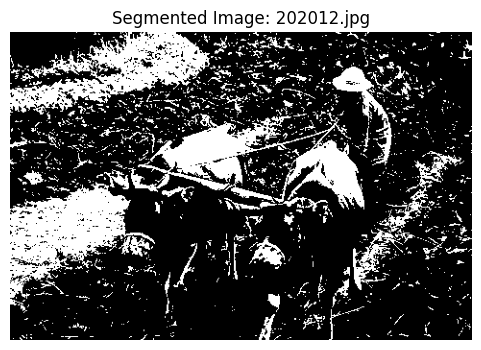

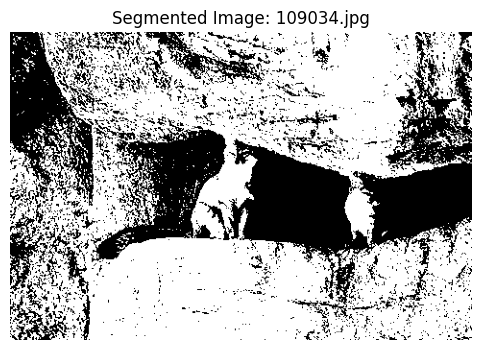

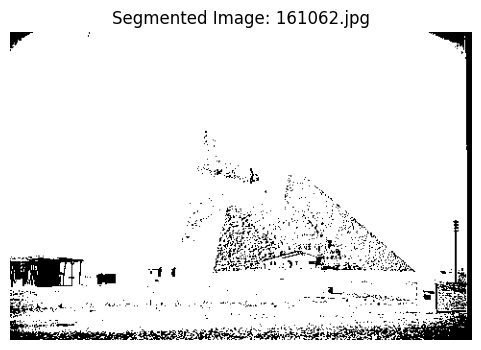

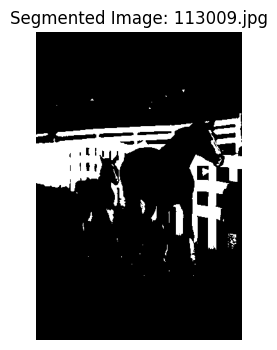

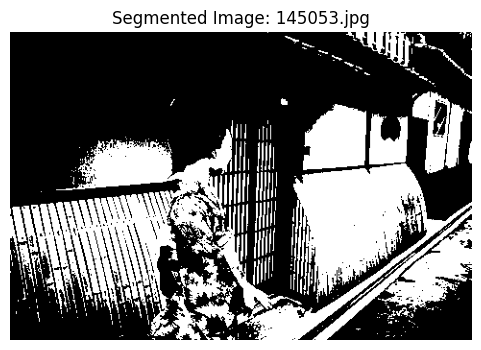

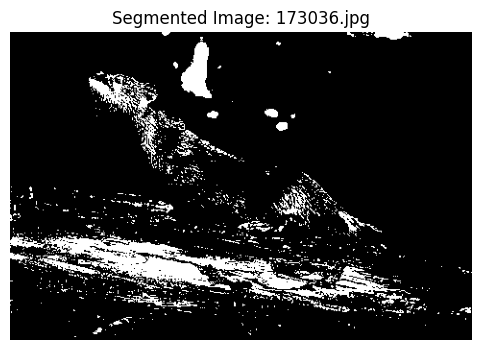

In [4]:
import matplotlib.pyplot as plt


num_images_to_display = 10
for i in range(min(num_images_to_display, len(segmented_images_all))):
    segmented_image = segmented_images_all[i]['segmented_image']
    filename = segmented_images_all[i]['name']

    plt.figure(figsize=(8, 4))
    plt.imshow(segmented_image, cmap='binary')
    plt.title('Segmented Image: {}'.format(filename))
    plt.axis('off')
    plt.show()


In [5]:
import numpy as np
from collections import Counter

# Function to create a global frequency table of RGB tuples mapped to 0 and 1
def create_global_frequency_table(rgb_arrays, binary_arrays):
    # Initialize counters for mapping to 0 and 1
    count_0 = Counter()
    count_1 = Counter()

    # Iterate over each pair of RGB and binary arrays
    for (_, binary_array), (_, rgb_array) in zip(binary_arrays, rgb_arrays):
        # Iterate over each pixel in the RGB array
        for y in range(len(rgb_array)):
            for x in range(len(rgb_array[0])):
                # Get the RGB tuple at the current pixel
                (r ,g ,b) = rgb_array[y][x]

                # Map the RGB tuple to the corresponding binary value
                binary_value = binary_array[y][x]

                # Increment the corresponding counter based on the binary value
                if binary_value == 0:
                    count_0[(r ,g ,b)] += 1
                else:
                    count_1[(r ,g ,b)] += 1

    return count_0, count_1

# Example data
# Assuming GroundTruth and rgb_arrays are lists of tuples where the first element of each tuple is the image name
# and the second element is the corresponding array
GroundTruth = GroundTruth
rgb_arrays = output_data_with_names
# Create the global frequency table
global_count_0, global_count_1 = create_global_frequency_table(rgb_arrays, GroundTruth)

# Print only the first 5 values in each count
print("First 5 values in global Frequency table for RGB tuples mapped to 0:")
for i, (rgb_tuple, frequency) in enumerate(global_count_0.items()):
    print("RGB tuple:", rgb_tuple, "- Frequency:", frequency)
    if i == 4:  # Print only the first 5 values
        break

print("\nFirst 5 values in global Frequency table for RGB tuples mapped to 1:")
for i, (rgb_tuple, frequency) in enumerate(global_count_1.items()):
    print("RGB tuple:", rgb_tuple, "- Frequency:", frequency)
    if i == 4:  # Print only the first 5 values
        break
print(len(global_count_0))
print(len(global_count_1))

First 5 values in global Frequency table for RGB tuples mapped to 0:
RGB tuple: (61, 130, 147) - Frequency: 22
RGB tuple: (65, 134, 151) - Frequency: 23
RGB tuple: (70, 139, 156) - Frequency: 51
RGB tuple: (73, 142, 159) - Frequency: 43
RGB tuple: (74, 143, 160) - Frequency: 30

First 5 values in global Frequency table for RGB tuples mapped to 1:
RGB tuple: (7, 20, 22) - Frequency: 759
RGB tuple: (5, 23, 24) - Frequency: 239
RGB tuple: (8, 28, 33) - Frequency: 534
RGB tuple: (0, 26, 30) - Frequency: 151
RGB tuple: (10, 46, 52) - Frequency: 129
674904
542241


In [6]:
# Find RGB tuples that occurred in both count_0 and count_1
common_rgb_tuples = set(global_count_0.keys()) & set(global_count_1.keys())

# Print the common RGB tuples
print("RGB tuples occurred in both count_0 and count_1:", len(common_rgb_tuples))



RGB tuples occurred in both count_0 and count_1: 0


In [7]:
# Find all unique RGB tuples from count_0 and count_1
all_rgb_tuples = set(global_count_0.keys()) | set(global_count_1.keys())

# Calculate the total occurrences of each RGB tuple across count_0 and count_1
total_occurrences = {rgb_tuple: global_count_0[rgb_tuple] + global_count_1[rgb_tuple] for rgb_tuple in all_rgb_tuples}

# Calculate the probability of each RGB tuple being mapped to 0 or 1
probabilities = {}
for rgb_tuple in all_rgb_tuples:
    if rgb_tuple in global_count_0 and rgb_tuple in global_count_1:
        total_occurrence = total_occurrences[rgb_tuple]
        probability_0 = global_count_0[rgb_tuple] / total_occurrence
        probability_1 = global_count_1[rgb_tuple] / total_occurrence
    elif rgb_tuple in global_count_0:
        probability_0 = 1
        probability_1 = 0
    elif rgb_tuple in global_count_1:
        probability_0 = 0
        probability_1 = 1

    probabilities[rgb_tuple] = {'Probability_0': probability_0, 'Probability_1': probability_1}

# Print the probabilities for RGB tuples
# Print the probabilities for RGB tuples
print("Probabilities of RGB tuples being mapped to 0 and 1 (first 5 tuples):")
for i, (rgb_tuple, probability) in enumerate(probabilities.items()):
   if rgb_tuple in global_count_0 and rgb_tuple in global_count_1:
    print("RGB tuple:", rgb_tuple)
    print("Probability to be mapped to 0:", probability['Probability_0'])
    print("Probability to be mapped to 1:", probability['Probability_1'])
    print(global_count_0[rgb_tuple])
    print(global_count_1[rgb_tuple])
    print()
    if i == 100:
        break


Probabilities of RGB tuples being mapped to 0 and 1 (first 5 tuples):


In [8]:
rgb_tuple_to_check = (3, 8, 14) # Replace r, g, b with the RGB values you want to check

# Check if the RGB tuple is common between count_0 and count_1
is_common_rgb = rgb_tuple_to_check in global_count_0 and rgb_tuple_to_check in global_count_1

# Print the result
if is_common_rgb:
    print("The RGB tuple", rgb_tuple_to_check, "is common between count_0 and count_1.")
else:
    print("The RGB tuple", rgb_tuple_to_check, "is not common between count_0 and count_1.")


The RGB tuple (3, 8, 14) is not common between count_0 and count_1.


#Testing


In [9]:
import os
import matplotlib.pyplot as plt
from skimage import io, color
import numpy as np
from google.colab import drive

drive.mount('/content/gdrive')

# Path to the directory containing images
directory = '/content/gdrive/MyDrive/Dataset/test'

# Get a list of all image files in the directory
image_files = [f for f in os.listdir(directory) if f.endswith('.jpg') or f.endswith('.png')]

segmented_images_all_testing = []

# Process and display all images
for image_file in image_files:
    # Load the image
    image_path = os.path.join(directory, image_file)
    image = io.imread(image_path)

    # Convert the image to grayscale
    gray_image = color.rgb2gray(image)

    # Apply thresholding
    threshold = 0.5
    segmented_image = np.where(gray_image > threshold, 0.0, 1.0)

    # Append the segmented image along with its name to the list
    segmented_images_all_testing.append({'name': image_file, 'segmented_image': segmented_image})

# Print the segmented images with their names
for segmented_image_info in segmented_images_all_testing[:10]:
    print("Name:", segmented_image_info['name'])
    print("Segmented Image:")
    print(segmented_image_info['segmented_image'])
    print("Shape:", segmented_image_info['segmented_image'].shape)
    print()


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Name: 100039.jpg
Segmented Image:
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 0. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 0. ... 1. 1. 1.]
 [0. 0. 1. ... 1. 1. 1.]
 [0. 1. 1. ... 1. 1. 1.]]
Shape: (321, 481)

Name: 100007.jpg
Segmented Image:
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]]
Shape: (321, 481)

Name: 108036.jpg
Segmented Image:
[[1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 1. 1. 0.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]]
Shape: (321, 481)

Name: 156054.jpg
Segmented Image:
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
Shape: (481, 321)

Name: 107014.jpg
Segmented Image:

In [10]:
import os
import cv2

# Function to process a single image and extract its RGB components
def process_image(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Check the dimensions
    height, width, channels = image.shape

    # Initialize an empty array to store the RGB components
    rgb_array = [[[0, 0, 0] for _ in range(width)] for _ in range(height)]

    # Iterate over each pixel and extract its RGB components
    for y in range(height):
        for x in range(width):
            # Get the RGB values at the current pixel
            (r ,g ,b) = image[y, x]
            # Store the RGB components in the array
            rgb_array[y][x] = (r ,g ,b)  # Store as tuple

    return rgb_array

# Directory containing the images
images_directory = '/content/gdrive/MyDrive/Dataset/test'# Replace "images_directory" with the path to your directory containing images

# List to store the output of each image along with their names
output_data_with_names_testing = []

# Loop through each image in the directory
for filename in os.listdir(images_directory):
    if filename.endswith(".jpg") or filename.endswith(".png"):  # You can add more extensions if needed
        # Process the image
        image_path = os.path.join(images_directory, filename)
        rgb_array = process_image(image_path)

        # Store the output of the image along with its name
        output_data_with_names_testing.append((filename, rgb_array))

# Output the summary of the first 5 elements of the output data along with their names
for i in range(min(5, len(output_data_with_names_testing))):
    name, data = output_data_with_names_testing[i]
    print("Name of image:", name)
    print("Summary of output data:")
    print("Shape:", len(data), "x", len(data[0]), "RGB tuples")
    print("Sample data (first 3 rows):", data[:3])
    print()  # Add a newline for clarity
print(output_data_with_names_testing[1])

Name of image: 100039.jpg
Summary of output data:
Shape: 321 x 481 RGB tuples
Sample data (first 3 rows): [[(117, 128, 95), (111, 122, 89), (117, 125, 94), (112, 125, 93), (110, 126, 95), (99, 122, 90), (110, 136, 106), (113, 137, 107), (123, 138, 110), (127, 134, 107), (143, 145, 116), (182, 180, 150), (241, 241, 211), (255, 255, 223), (253, 255, 222), (251, 255, 222), (251, 255, 225), (253, 255, 227), (255, 255, 228), (255, 255, 223), (255, 255, 218), (251, 248, 203), (253, 249, 201), (255, 255, 209), (255, 253, 203), (250, 241, 191), (222, 214, 167), (198, 192, 147), (204, 197, 154), (220, 213, 174), (225, 219, 182), (209, 203, 166), (214, 208, 167), (213, 206, 163), (242, 227, 188), (231, 216, 177), (228, 215, 177), (226, 217, 179), (231, 225, 184), (234, 230, 189), (245, 240, 201), (255, 255, 229), (232, 225, 216), (196, 192, 191), (252, 255, 253), (253, 255, 252), (255, 255, 254), (255, 254, 253), (255, 255, 255), (255, 255, 255), (253, 255, 254), (250, 254, 242), (255, 255, 233)

In [11]:
from skimage import color

GroundTruthTesting = []

# Iterate over each segmented image
for segmented_image_info in segmented_images_all_testing:
    # Convert the segmented image to grayscale
    segmented_image_gray = (segmented_image_info['segmented_image'])

    # Append a tuple containing the name and the grayscale image to GroundTruth
    GroundTruthTesting.append((segmented_image_info['name'], segmented_image_gray))

# Print the name and grayscale image along with their shape for the first 10 images
for name, segmented_image_gray in GroundTruthTesting[:10]:
    print("Name:", name)
    print("Grayscale Image:")
    print(segmented_image_gray)
    print("Shape:", segmented_image_gray.shape)
    print()  # Add a newline for clarity
print(GroundTruthTesting[1])

Name: 100039.jpg
Grayscale Image:
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 0. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 0. ... 1. 1. 1.]
 [0. 0. 1. ... 1. 1. 1.]
 [0. 1. 1. ... 1. 1. 1.]]
Shape: (321, 481)

Name: 100007.jpg
Grayscale Image:
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]]
Shape: (321, 481)

Name: 108036.jpg
Grayscale Image:
[[1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 1. 1. 0.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]]
Shape: (321, 481)

Name: 156054.jpg
Grayscale Image:
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
Shape: (481, 321)

Name: 107014.jpg
Grayscale Image:
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [0. 0. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]


In [12]:
#print("Shape of probabilities:", probabilities[:5])
rgb_tuple3333 =(117, 128, 95)
# Define a function to get the probability result for an RGB tuple
def get_probability_result(rgb_tuple):
    if (rgb_tuple) in (probabilities):
        probability_0 = probabilities[rgb_tuple]['Probability_0']
        probability_1 = probabilities[rgb_tuple]['Probability_1']

        if probability_0 > probability_1:
            return 0
        elif probability_1 > probability_0:
            return 1
        else:
            return None  # Probability is exactly 0.5
    else:
        return None  # RGB tuple not in the probability table
print(get_probability_result(1))


testing_the_image = []

# Iterate over each test image
for test_image in output_data_with_names_testing:
    image_name, image_data = test_image
    new_image_data = []
    last_entry = None

    # Iterate over each row of pixels in the image
    for row in image_data:
        new_row_data = []

        # Iterate over each pixel in the row
        for pixel in row:
            # Check if pixel is a tuple
            if isinstance(pixel, tuple):
                # Get the probability result for the RGB tuple
                #print(pixel)
                probability_result = get_probability_result(pixel)

                if probability_result is not None:
                    # If probability result is available, add it to the new row data
                    new_row_data.append(probability_result)
                else:
                    # If probability result is not available, use the last entry made into the array
                    if last_entry is not None:
                        new_row_data.append(last_entry)
                    else:
                        # If no last entry is available, assign 0
                        new_row_data.append(0)

                # Update last_entry
                last_entry = new_row_data[-1]

        # Add the new row data to the new image data
        new_image_data.append(new_row_data)

    # Add the new image data along with the image name to the list of new images
    testing_the_image.append((image_name, new_image_data))

# Now testing_the_image contain the new images with pixel values replaced based on probabilities,
# along with the corresponding photo name from the original input


None


In [13]:
print("Shape of new_image_data arrays in testing_the_image (first 5):")
for i in range(min(5, len(testing_the_image))):
    image_name, image_data = testing_the_image[i]
    print("Image:", image_name)
    print("Shape:", len(image_data), "x", len(image_data[0]))

Shape of new_image_data arrays in testing_the_image (first 5):
Image: 100039.jpg
Shape: 321 x 481
Image: 100007.jpg
Shape: 321 x 481
Image: 108036.jpg
Shape: 321 x 481
Image: 156054.jpg
Shape: 481 x 321
Image: 107014.jpg
Shape: 321 x 481


In [14]:
# Create a list to store accuracies for each image
accuracies = []

# Iterate over each image in testing_the_image
for test_image, ground_truth_image in zip(testing_the_image, GroundTruthTesting):
    test_image_name, test_image_data = test_image
    ground_truth_name, ground_truth_data = ground_truth_image

    # Compare image names
    if test_image_name == ground_truth_name:
        # Convert image data to binary format (0 or 1)
        test_binary_data = [[1 if pixel == 1 else 0 for pixel in row] for row in test_image_data]

        # Compare binary values
        correct_pixels = sum(1 for row_test, row_ground_truth in zip(test_binary_data, ground_truth_data) for pixel_test, pixel_ground_truth in zip(row_test, row_ground_truth) if pixel_test == pixel_ground_truth)
        total_pixels = sum(len(row) for row in ground_truth_data)
        accuracy = correct_pixels / total_pixels

        # Append accuracy to the list
        accuracies.append(accuracy)
    else:
        # If image names don't match, skip comparison
        accuracies.append(0)  # Append 0 accuracy as placeholder

# Print accuracies for each image
for i, accuracy in enumerate(accuracies, start=1):
    print(f"Accuracy for image {i}: {accuracy}")


Accuracy for image 1: 0.9998445605922242
Accuracy for image 2: 1.0
Accuracy for image 3: 0.9999935233580093
Accuracy for image 4: 0.9995595883446351
Accuracy for image 5: 0.9999222802961121
Accuracy for image 6: 0.9995336817766725
Accuracy for image 7: 1.0
Accuracy for image 8: 1.0
Accuracy for image 9: 1.0
Accuracy for image 10: 0.9996632146164857
Accuracy for image 11: 0.9988406810836717
Accuracy for image 12: 0.9963406972752767
Accuracy for image 13: 0.9952461447788551
Accuracy for image 14: 0.9999935233580093
Accuracy for image 15: 0.999274616097046
Accuracy for image 16: 0.999028503701401
Accuracy for image 17: 0.9655572178936664
Accuracy for image 18: 0.9990738401953355
Accuracy for image 19: 0.9855182285088827
Accuracy for image 20: 1.0
Accuracy for image 21: 1.0
Accuracy for image 22: 0.9836788621835351
Accuracy for image 23: 0.9998898970861587
Accuracy for image 24: 0.999941710222084
Accuracy for image 25: 0.802332886445036
Accuracy for image 26: 1.0
Accuracy for image 27: 0.9

In [15]:
average_accuracy = sum(accuracies) / len(accuracies)

print("Average accuracy:", average_accuracy)

Average accuracy: 0.9947432659114903
